#Default of Credit Card Clients Dataset



##https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

In [29]:
%config IPCompleter.greedy=True
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [6]:
data = pd.read_csv('data//UCI_Credit_Card.csv')

In [8]:

data['BILL_TOTAL'] = data['BILL_AMT1'] + data['BILL_AMT2'] + data['BILL_AMT3'] + data['BILL_AMT4'] + data['BILL_AMT5'] + data['BILL_AMT6']

In [15]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,238114.0
6,7,500000.0,1,1,2,29,0,0,0,0,...,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0,2724595.0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,13486.0
8,9,140000.0,2,3,1,28,0,0,2,0,...,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0,65212.0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0,26919.0


In [16]:
x = data.iloc[:,[1,25]]

In [17]:
x

,LIMIT_BAL,BILL_TOTAL
0,20000.0,7704.0
1,120000.0,17077.0
2,90000.0,101653.0
3,50000.0,231334.0
4,50000.0,109339.0
5,50000.0,238114.0
6,500000.0,2724595.0
7,100000.0,13486.0
8,140000.0,65212.0
9,20000.0,26919.0


In [18]:
x.values

array([[ 20000.,   7704.],
       [120000.,  17077.],
       [ 90000., 101653.],
       ...,
       [ 30000.,  70496.],
       [ 80000., 266611.],
       [ 50000., 230874.]])

In [19]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [23]:
wcss

[60000.0,
 35196.57080583445,
 20128.11054203372,
 14943.566759185553,
 10707.335561911736,
 8603.395384848945,
 7397.805139634535,
 6352.757487939142,
 5665.8238577401835,
 5051.207193214618]

Text(0,0.5,'WCSS')

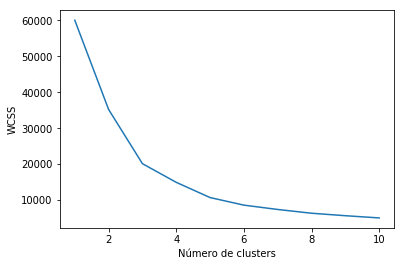

In [24]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

In [25]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
previsoes = kmeans.fit_predict(x)

In [26]:
previsoes

array([3, 3, 3, ..., 3, 3, 3])

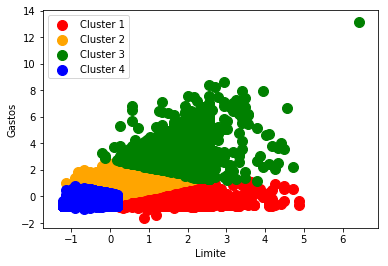

In [28]:
plt.scatter(x[previsoes == 0, 0], x[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[previsoes == 1, 0], x[previsoes == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(x[previsoes == 2, 0], x[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[previsoes == 3, 0], x[previsoes == 3, 1], s = 100, c = 'blue', label = 'Cluster 4')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()


In [31]:
lista = np.column_stack((data, previsoes))

In [32]:
lista

array([[1.00000e+00, 2.00000e+04, 2.00000e+00, ..., 1.00000e+00,
        7.70400e+03, 3.00000e+00],
       [2.00000e+00, 1.20000e+05, 2.00000e+00, ..., 1.00000e+00,
        1.70770e+04, 3.00000e+00],
       [3.00000e+00, 9.00000e+04, 2.00000e+00, ..., 0.00000e+00,
        1.01653e+05, 3.00000e+00],
       ...,
       [2.99980e+04, 3.00000e+04, 1.00000e+00, ..., 1.00000e+00,
        7.04960e+04, 3.00000e+00],
       [2.99990e+04, 8.00000e+04, 1.00000e+00, ..., 1.00000e+00,
        2.66611e+05, 3.00000e+00],
       [3.00000e+04, 5.00000e+04, 1.00000e+00, ..., 1.00000e+00,
        2.30874e+05, 3.00000e+00]])

In [33]:
lista_clientes = lista[lista[:,26].argsort()]

In [34]:
lista_clientes

array([[ 9.60000e+03,  4.80000e+05,  2.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 9.92000e+03,  2.00000e+05,  2.00000e+00, ...,  0.00000e+00,
         3.01220e+04,  0.00000e+00],
       [ 9.92200e+03,  4.00000e+05,  2.00000e+00, ...,  0.00000e+00,
         7.18000e+02,  0.00000e+00],
       ...,
       [ 1.29910e+04,  6.00000e+04,  2.00000e+00, ...,  1.00000e+00,
         2.47843e+05,  3.00000e+00],
       [ 1.30020e+04,  6.00000e+04,  2.00000e+00, ...,  0.00000e+00,
        -1.62000e+03,  3.00000e+00],
       [ 3.00000e+04,  5.00000e+04,  1.00000e+00, ...,  1.00000e+00,
         2.30874e+05,  3.00000e+00]])